<a href="https://colab.research.google.com/github/nsundriyal62/SkinSense--AI_Guardian_for_Skin_Health/blob/main/Skin_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset_url=r'/content/drive/MyDrive/skin_cancer_dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, glob

In [ ]:
import numpy as np

In [ ]:
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install tensorflow

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report
import os
import glob

In [ ]:
file_path = '/content/drive/MyDrive/skin_cancer_dataset/train'

In [ ]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

In [ ]:
import pandas as pd

In [ ]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/drive/MyDrive/skin_cancer_dataset/tra...,malignant
1,/content/drive/MyDrive/skin_cancer_dataset/tra...,malignant
2,/content/drive/MyDrive/skin_cancer_dataset/tra...,malignant
3,/content/drive/MyDrive/skin_cancer_dataset/tra...,malignant
4,/content/drive/MyDrive/skin_cancer_dataset/tra...,benign


In [ ]:
#balancing

In [ ]:
import seaborn as sns

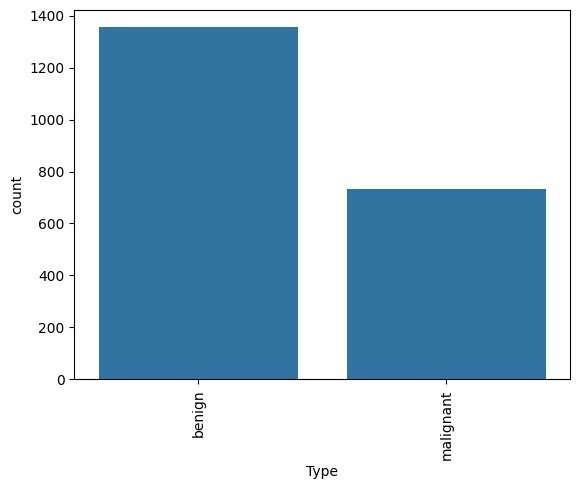

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
#balance by deleting extra images (Augmentor API)
#augmentation
#GAN

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

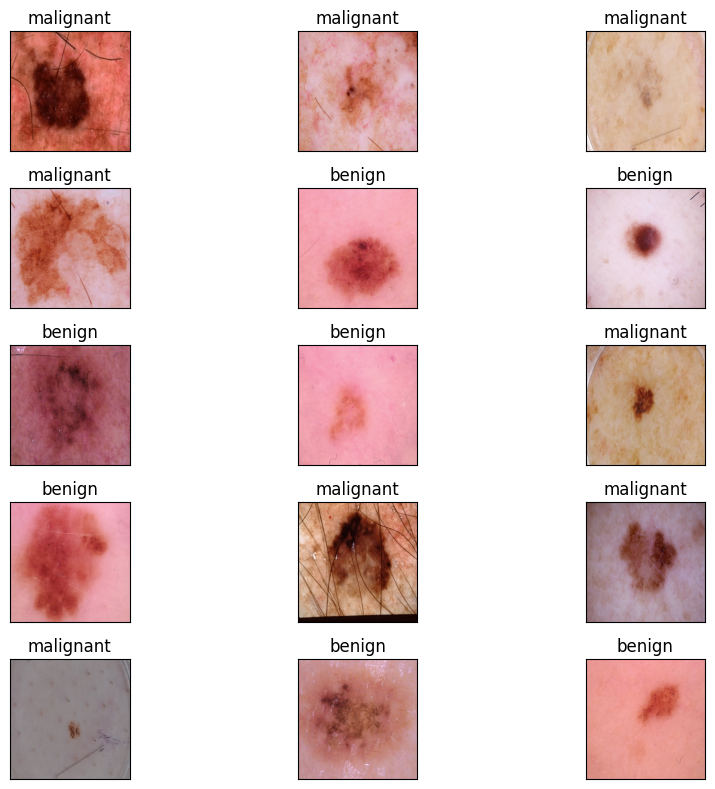

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1564 validated image filenames belonging to 2 classes.
Found 522 validated image filenames belonging to 2 classes.
Found 522 validated image filenames belonging to 2 classes.


In [ ]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100
49/49 [==============================] - 1571s 32s/step - loss: 0.4366 - accuracy: 0.7916 - val_loss: 0.4249 - val_accuracy: 0.7989
Epoch 2/100
49/49 [==============================] - 13s 266ms/step - loss: 0.2789 - accuracy: 0.8645 - val_loss: 0.3296 - val_accuracy: 0.8487
Epoch 3/100
49/49 [==============================] - 13s 261ms/step - loss: 0.2241 - accuracy: 0.8971 - val_loss: 0.3751 - val_accuracy: 0.8410
Epoch 4/100
49/49 [==============================] - 13s 271ms/step - loss: 0.2087 - accuracy: 0.9060 - val_loss: 0.3429 - val_accuracy: 0.8602
Epoch 5/100
49/49 [==============================] - 11s 222ms/step - loss: 0.1708 - accuracy: 0.9252 - val_loss: 0.3001 - val_accuracy: 0.8736
Epoch 6/100
49/49 [==============================] - 11s 231ms/step - loss: 0.1087 - accuracy: 0.9597 - val_loss: 0.3015 - val_accuracy: 0.8812
Epoch 7/100
49/49 [==============================] - 11s 232ms/step - loss: 0.0917 - accuracy: 0.9668 - val_loss: 0.3623 - val_accuracy:

In [ ]:
model.save("skin_cancer_bin_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.00656
Test Accuracy: 87.36%


In [ ]:
import numpy as np

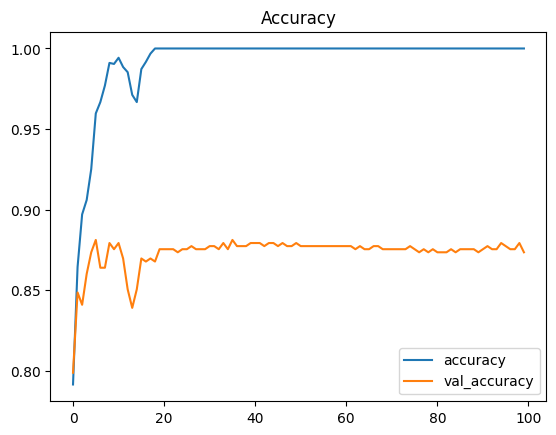

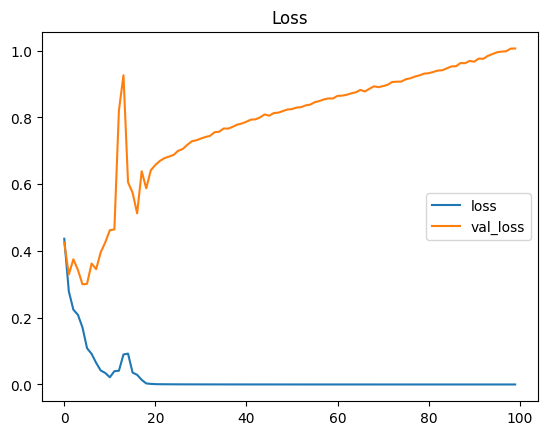

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

17/17 [==============================] - 5s 189ms/step


In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.88      0.92      0.90       322
   malignant       0.86      0.80      0.83       200

    accuracy                           0.87       522
   macro avg       0.87      0.86      0.86       522
weighted avg       0.87      0.87      0.87       522



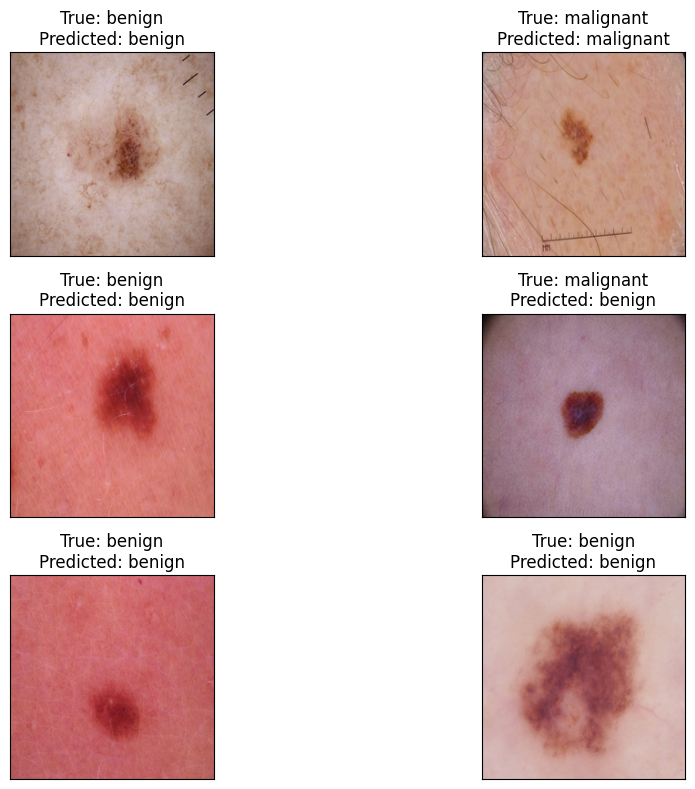

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
# model.save('/content/skin_cancer_bin_model.h5')
loaded_model_imageNet = load_model("/content/skin_cancer_bin_model.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
import matplotlib.pyplot as plt

1/1 [==============================] - 2s 2s/step
[[ 0 99]]


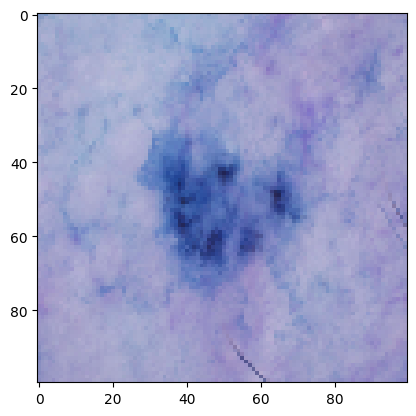

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '/content/drive/MyDrive/skin_cancer_dataset/test/malignant/1037.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))
plt.imshow(img)


In [ ]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[0, 99]


In [ ]:
print("Largest element is:", max(pp))

Largest element is: 99


In [ ]:
index = pp.index(max(pp))

In [ ]:
name_class=['Benign', 'Malignant']

In [ ]:
name_class[index]

'Malignant'

array([[[201, 155, 131],
        [196, 149, 129],
        [200, 159, 137],
        ...,
        [192, 143, 146],
        [193, 145, 145],
        [195, 145, 144]],

       [[195, 147, 124],
        [201, 159, 137],
        [199, 158, 138],
        ...,
        [192, 144, 144],
        [194, 148, 150],
        [190, 145, 140]],

       [[188, 140, 117],
        [198, 156, 134],
        [205, 160, 139],
        ...,
        [196, 147, 150],
        [195, 149, 151],
        [193, 145, 143]],

       ...,

       [[193, 142, 141],
        [194, 142, 146],
        [193, 141, 143],
        ...,
        [195, 145, 148],
        [196, 139, 148],
        [192, 134, 133]],

       [[194, 138, 141],
        [188, 140, 140],
        [193, 145, 145],
        ...,
        [191, 132, 134],
        [192, 131, 138],
        [190, 128, 129]],

       [[191, 135, 134],
        [192, 144, 140],
        [195, 150, 147],
        ...,
        [193, 128, 126],
        [192, 129, 122],
        [192, 130, 131]]], dtype=uint8)
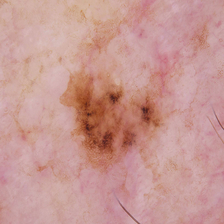

In [ ]:
plt.imread(img_path)

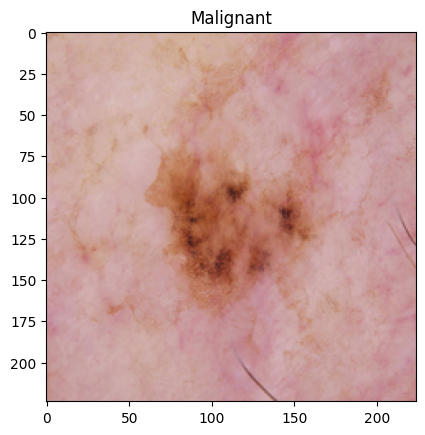

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()